In [1]:
# Importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset using pandas library.
bike=pd.read_csv("C:/Users/kvknb/OneDrive/Desktop/bike.csv")

In [3]:
print(bike.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count  
0       3          13     16  
1       8          32     40  
2       5          27     32  
3       3          10     13  
4       0           1      1  


In [4]:
print(bike.shape)

(10886, 11)


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [6]:
bike.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [7]:
bike["season"].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [8]:
df=pd.DataFrame(bike)

In [9]:
df1=(df-df.mean())/df.std()

In [10]:
print(df1.head())

     season   holiday  workingday   weather      temp     atemp  humidity  \
0 -1.349802 -0.171483   -1.460605 -0.660148 -1.333599 -1.092687  0.993167   
1 -1.349802 -0.171483   -1.460605 -0.660148 -1.438841 -1.182367  0.941206   
2 -1.349802 -0.171483   -1.460605 -0.660148 -1.438841 -1.182367  0.941206   
3 -1.349802 -0.171483   -1.460605 -0.660148 -1.333599 -1.092687  0.681399   
4 -1.349802 -0.171483   -1.460605 -0.660148 -1.333599 -1.092687  0.681399   

   windspeed    casual  registered     count  
0  -1.567682 -0.660962   -0.943810 -0.969249  
1  -1.567682 -0.560882   -0.818015 -0.836758  
2  -1.567682 -0.620930   -0.851119 -0.880922  
3  -1.567682 -0.660962   -0.963673 -0.985811  
4  -1.567682 -0.721009   -1.023260 -1.052056  


In [11]:
from scipy import stats

In [12]:
z=np.abs(stats.zscore(df1))
print(z)

[[1.34986372 0.17149048 1.46067232 ... 0.66099193 0.94385353 0.9692938 ]
 [1.34986372 0.17149048 1.46067232 ... 0.56090822 0.81805246 0.83679677]
 [1.34986372 0.17149048 1.46067232 ... 0.62095844 0.851158   0.88096245]
 ...
 [1.33801198 0.17149048 0.68461625 ... 0.64097518 0.05593396 0.13014594]
 [1.33801198 0.17149048 0.68461625 ... 0.48084125 0.25525818 0.34545361]
 [1.33801198 0.17149048 0.68461625 ... 0.64097518 0.47375478 0.57180271]]


In [13]:
threshold=3
print(np.where(z>3))

(array([  265,   372,   373, ..., 10750, 10846, 10870], dtype=int64), array([7, 1, 1, ..., 9, 9, 9], dtype=int64))


In [14]:
Q1=df1["casual"].quantile(0.25)
Q3=df1["casual"].quantile(0.75)
IQR=Q3-Q1
idk=~((df1["casual"]<(Q1-1.5*IQR))|(df1["casual"]>(Q3+1.5*IQR))).any(axis=0)
idk

False

In [15]:
Q1=df1["registered"].quantile(0.25)
Q3=df1["registered"].quantile(0.75)
IQR=Q3-Q1
idk=~((df1["registered"]<(Q1-1.5*IQR))|(df1["registered"]>(Q3+1.5*IQR))).any(axis=0)
idk

False

In [16]:
Q1=df1["count"].quantile(0.25)
Q3=df1["count"].quantile(0.75)
IQR=Q3-Q1
idk=~((df1["count"]<(Q1-1.5*IQR))|(df1["count"]>(Q3+1.5*IQR))).any(axis=0)
idk

False

In [17]:
Q1=df1["windspeed"].quantile(0.25)
Q3=df1["windspeed"].quantile(0.75)
IQR=Q3-Q1
idk=~((df1["windspeed"]<(Q1-1.5*IQR))|(df1["windspeed"]>(Q3+1.5*IQR))).any(axis=0)
idk

False

In [18]:
Q1=df1["humidity"].quantile(0.25)
Q3=df1["humidity"].quantile(0.75)
IQR=Q3-Q1
idk=~((df1["humidity"]<(Q1-1.5*IQR))|(df1["humidity"]>(Q3+1.5*IQR))).any(axis=0)
idk

False

In [19]:
Q1=df1["weather"].quantile(0.25)
Q3=df1["weather"].quantile(0.75)
IQR=Q3-Q1
idk=~((df1["weather"]<(Q1-1.5*IQR))|(df1["weather"]>(Q3+1.5*IQR))).any(axis=0)
idk

False

In [20]:
Q1=df1["holiday"].quantile(0.25)
Q3=df1["holiday"].quantile(0.75)
IQR=Q3-Q1
idk=~((df1["holiday"]<(Q1-1.5*IQR))|(df1["holiday"]>(Q3+1.5*IQR))).any(axis=0)
idk

False

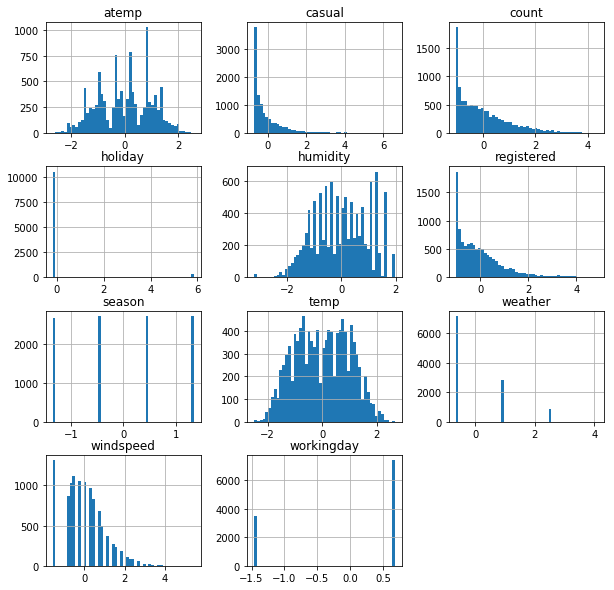

In [21]:
df1.hist(bins=50,figsize=(10,10))
plt.show()

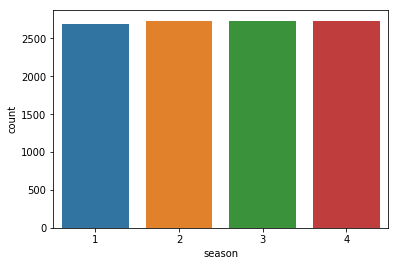

In [22]:
sns.countplot(df['season'])
plt.show()

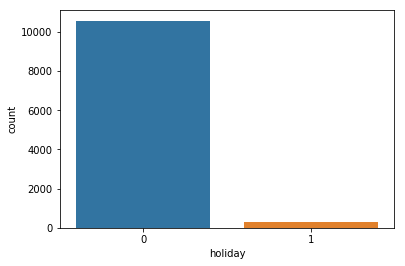

In [23]:
sns.countplot(df['holiday'])
plt.show()

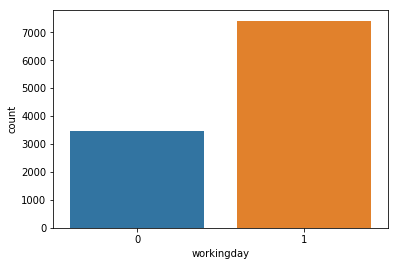

In [24]:
sns.countplot(df['workingday'])
plt.show()

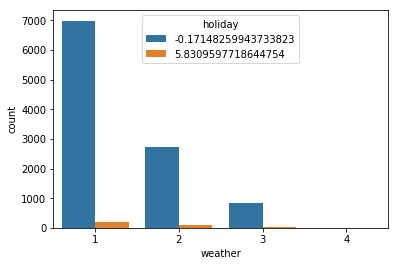

In [25]:
sns.countplot(df['weather'],hue='holiday',data=df1)
plt.show()

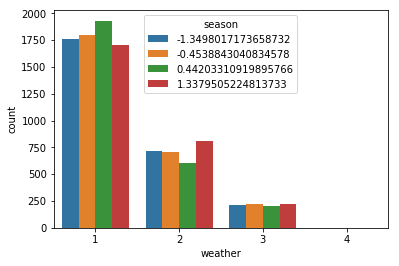

In [26]:
sns.countplot(df['weather'],hue="season",data=df1)

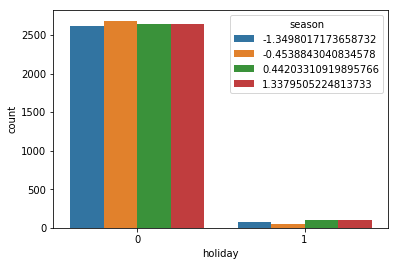

In [27]:
sns.countplot(df['holiday'],hue="season",data=df1)

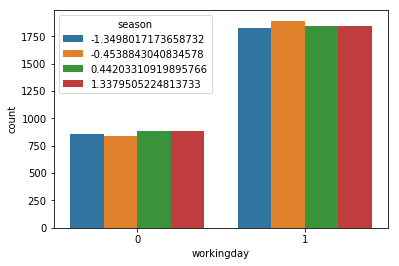

In [28]:
sns.countplot(df['workingday'],hue="season",data=df1)

C:\Users\kvknb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


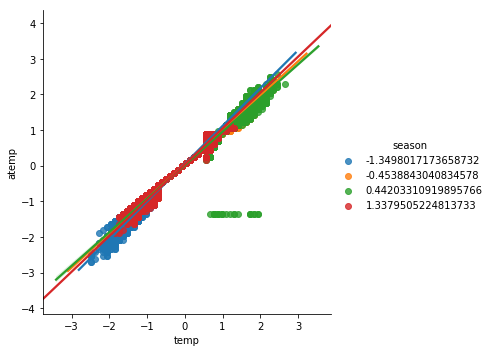

In [29]:
sns.lmplot(x='temp',y='atemp',data=df1,hue='season')

C:\Users\kvknb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


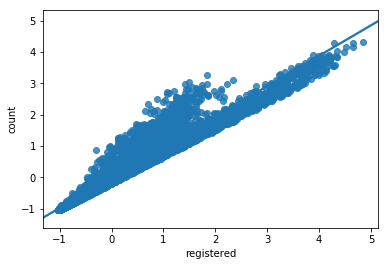

In [30]:
sns.regplot(x='registered',y='count',data=df1)

In [31]:
df1.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


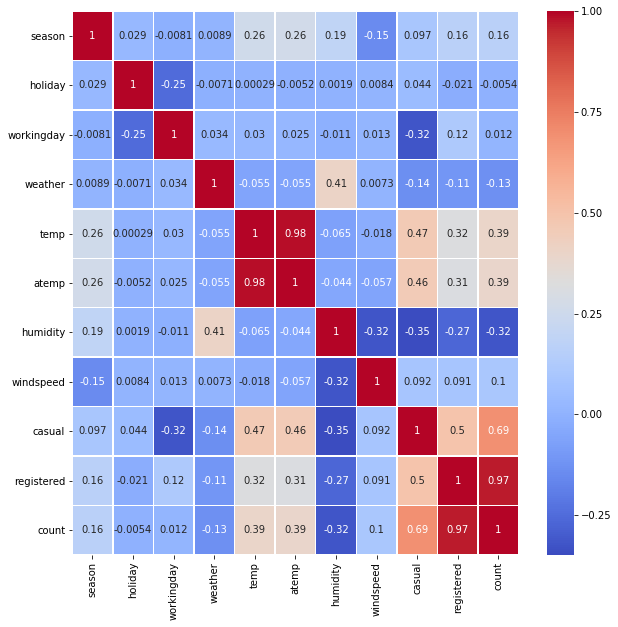

In [32]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df1.corr("pearson"),cmap='coolwarm',annot=True, linewidth=.5,ax=ax)
   
plt.show()

In [33]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [34]:
x=df1.drop('registered',axis=1)
y=df1[['registered']]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [36]:
lin_reg=LinearRegression()
lin_reg.fit(x_train[['count']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
ypred=lin_reg.predict(x_test[['count']])

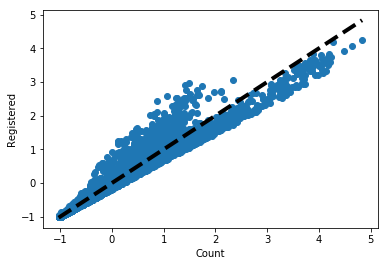

In [38]:
fig,ax=plt.subplots()
ax.scatter(y_test,ypred)
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('Count')
ax.set_ylabel('Registered')
plt.show()

In [39]:
print("Mean square error: %.2f" % mean_squared_error(y_test,ypred))
print("R^2 value: %.2f" % r2_score(y_test,ypred))

Mean square error: 0.06
R^2 value: 0.94


In [40]:
lin_reg=LinearRegression()
lin_reg.fit(x_train[['casual']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
ypred=lin_reg.predict(x_test[['casual']])

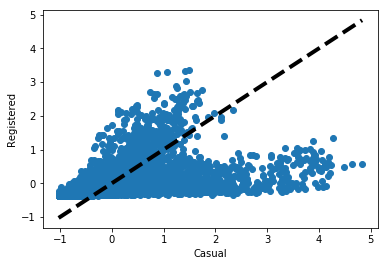

In [42]:
fig,ax=plt.subplots()
ax.scatter(y_test,ypred)
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('Casual')
ax.set_ylabel('Registered')
plt.show()

In [43]:
print("Mean square error: %.2f" % mean_squared_error(y_test,ypred))
print("R^2 value: %.2f" % r2_score(y_test,ypred))

Mean square error: 0.79
R^2 value: 0.24


In [44]:
lin_reg=LinearRegression()
lin_reg.fit(x_train[['temp']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
ypred=lin_reg.predict(x_test[['temp']])

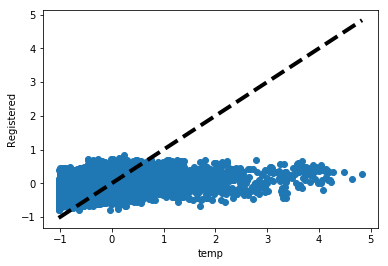

In [46]:
fig,ax=plt.subplots()
ax.scatter(y_test,ypred)
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('temp')
ax.set_ylabel('Registered')
plt.show()

In [47]:
print("Mean square error: %.2f" % mean_squared_error(y_test,ypred))
print("R^2 value: %.2f" % r2_score(y_test,ypred))

Mean square error: 0.93
R^2 value: 0.10


In [48]:
lin_reg=LinearRegression()
lin_reg.fit(x_train[['humidity','windspeed']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
ypred=lin_reg.predict(x_test[['humidity','windspeed']])

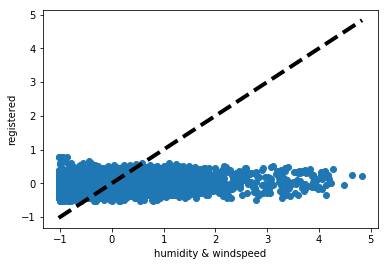

In [50]:
fig,ax=plt.subplots()
ax.scatter(y_test,ypred)
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('humidity & windspeed')
ax.set_ylabel('registered')
plt.show()

In [51]:
print("Mean square error: %.2f" % mean_squared_error(y_test,ypred))
print("R^2 value: %.2f" % r2_score(y_test,ypred))

Mean square error: 0.96
R^2 value: 0.08


In [52]:
lin_reg=LinearRegression()
lin_reg.fit(x_train[['season','holiday','workingday','weather']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
ypred=lin_reg.predict(x_test[['season','holiday','workingday','weather']])

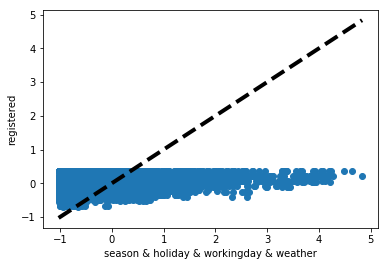

In [54]:
fig,ax=plt.subplots()
ax.scatter(y_test,ypred)
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.set_xlabel('season & holiday & workingday & weather')
ax.set_ylabel('registered')
plt.show()

In [55]:
print("Mean square error: %.2f" % mean_squared_error(y_test,ypred))
print("R^2 value: %.2f" % r2_score(y_test,ypred))

Mean square error: 0.98
R^2 value: 0.05


In [56]:
'''From the Linear and Multilinear Regression performed on the dataset, we can clearly see that only count as independent
varibale and registered as dependent variable are a good linear regression model.'''



'''Now we have to perform the lasso and ridge regression and compare the results given by these two.'''

'Now we have to perform the lasso and ridge regression and compare the results given by these two.'

In [57]:
#Importing the lasso regression from sklearn.linear_model

from sklearn.linear_model import Lasso

In [58]:
X=df1[['count']]
Y=df1['registered']

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=1)

In [60]:
lasso_reg=Lasso(alpha=0.2)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
lasso_pred=lasso_reg.predict(X_test)

In [62]:
print("Mean square error: %.2f" % mean_squared_error(Y_test,lasso_pred))
print("R^2 value: %.2f" % r2_score(Y_test,lasso_pred))

Mean square error: 0.10
R^2 value: 0.90


In [63]:
# Importing the ridge regression from sklearn package

from sklearn.linear_model import Ridge

In [64]:
ridge_reg=Ridge()
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
ridge_pred=ridge_reg.predict(X_test)

In [66]:
print("Mean square error: %.2f" % mean_squared_error(Y_test,ridge_pred))
print("R^2 value: %.2f" % r2_score(Y_test,ridge_pred))

Mean square error: 0.06
R^2 value: 0.94
